In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
#Checking shape of dataset
df.shape

(30, 17)

There are no null values

In [7]:
duplicate = df [df.duplicated()]
duplicate

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


There are no duplicates

In [8]:
#Checking value counts of target column
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

There are no missing values or spaces in the target column

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Looks like outliers exists in CG, SHO, SV and E columns as there is high jump from 75% to max.

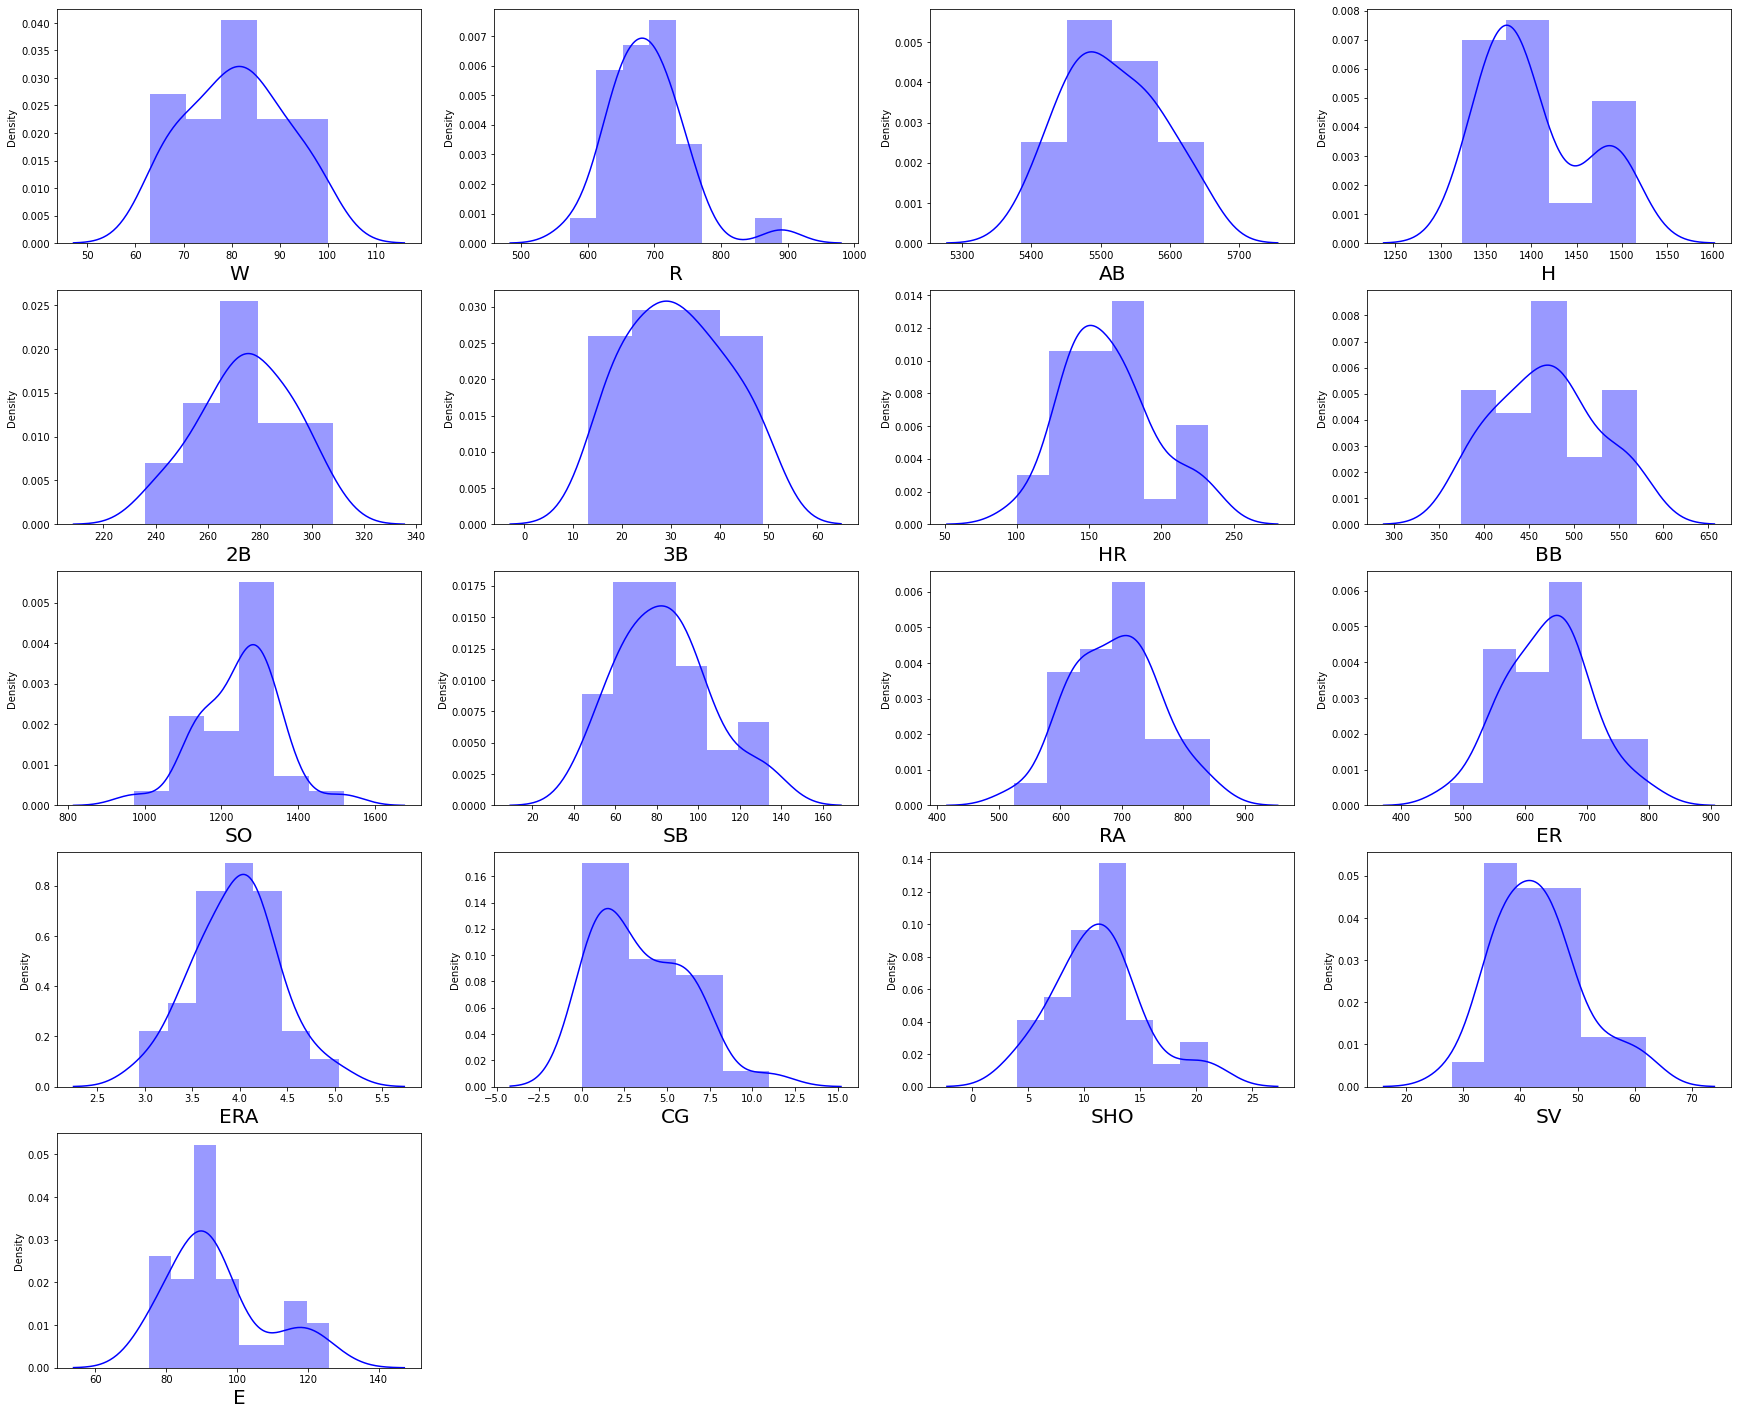

In [10]:
plt.figure(figsize = (30,25))
n = 1

for column in df:
    if n <=17:
        ax = plt.subplot(5,4,n)
        sns.distplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        
    n+=1
plt.show()

Except R,SO,CG and E, all the columns are normally distributed.

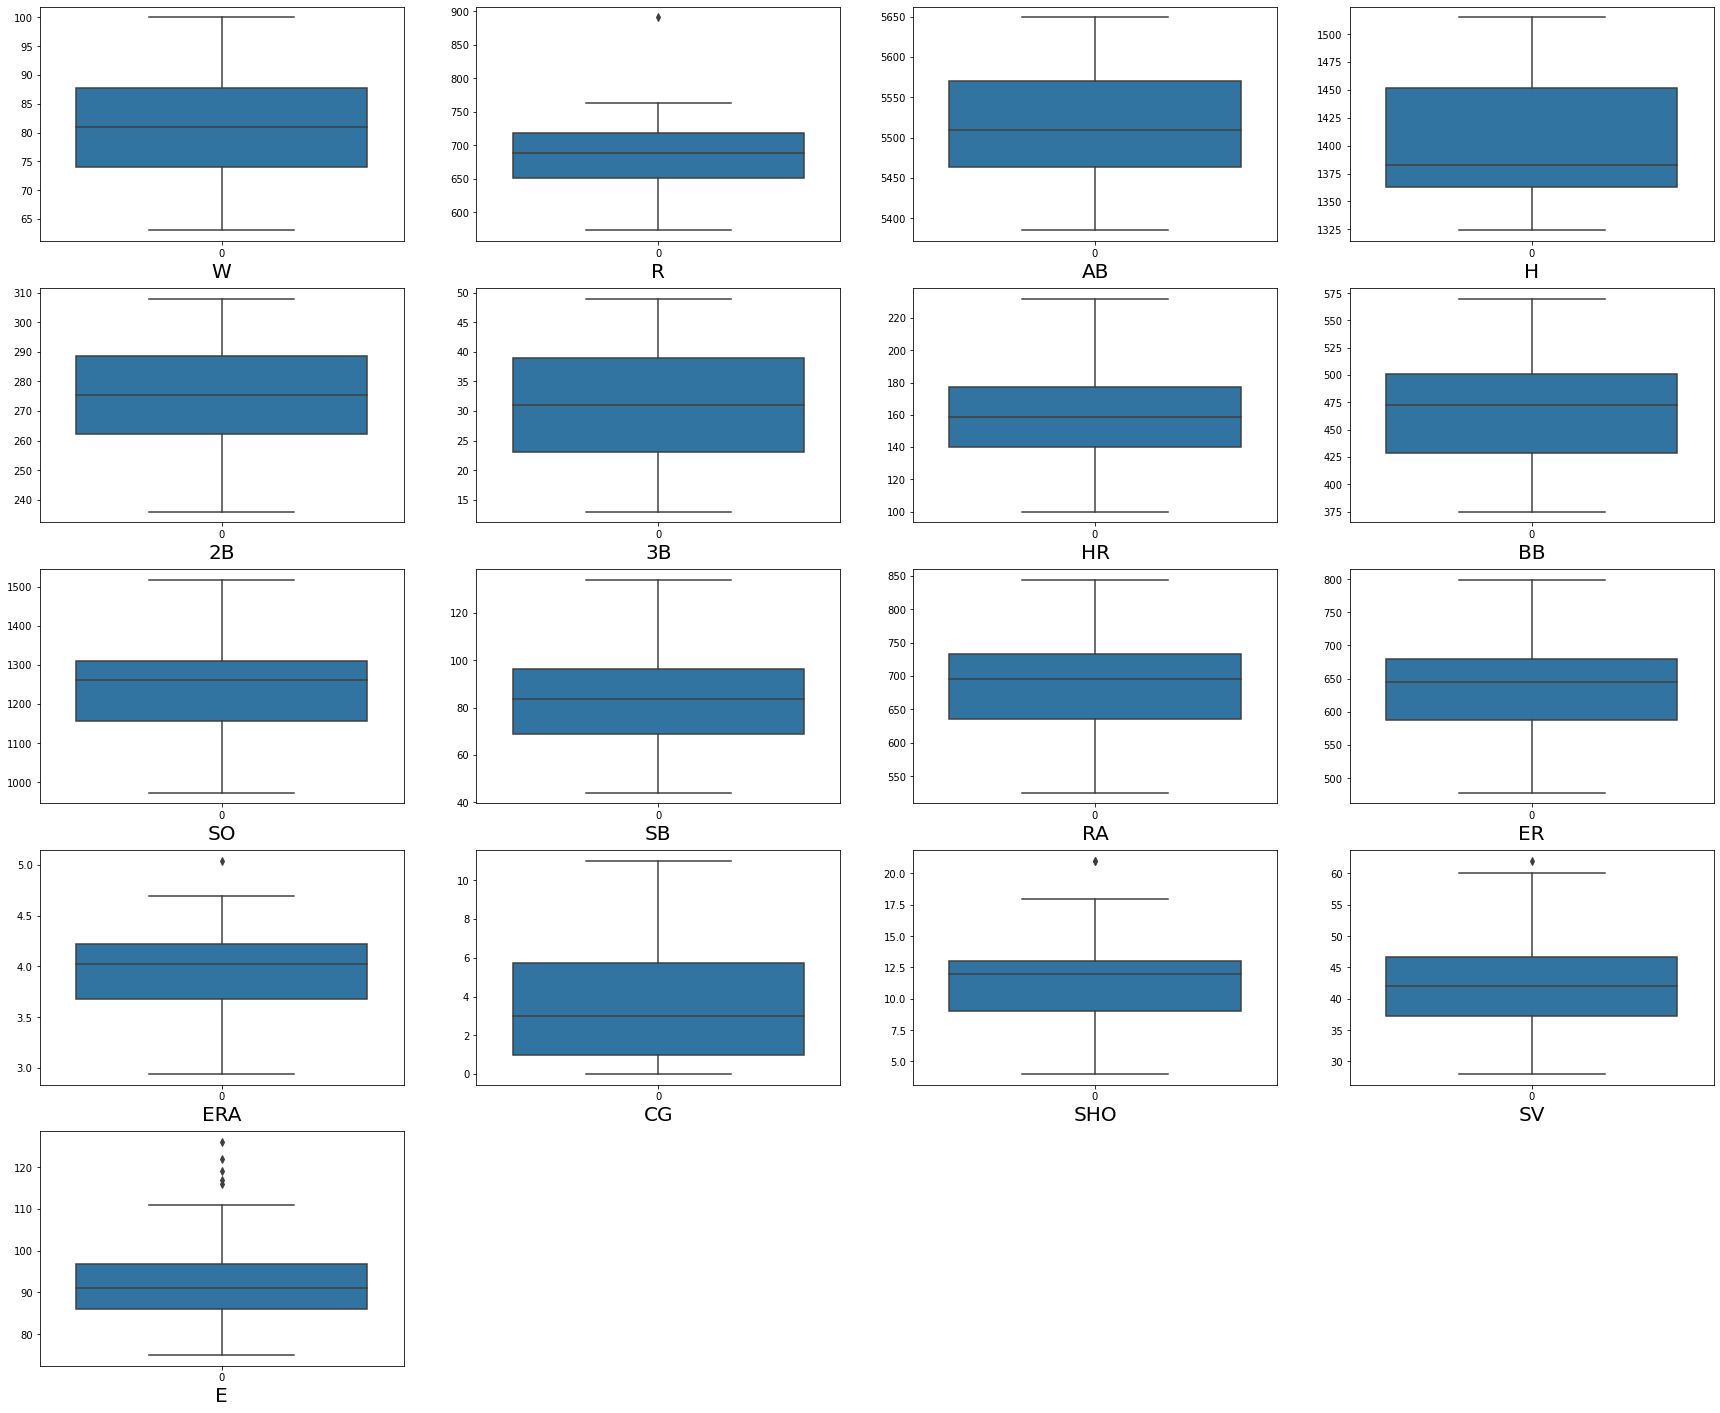

In [11]:
#Let's visualize the data using boxplot
plt.figure(figsize=(30,25))
n=1
for column in df:
    if n<=17:
        ax=plt.subplot(5,4,n)
        sns.boxplot(data=df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    n+=1
plt.show()

Looks like outliers exists in R, ERA, SHO, SV and E columns so we need remove outliers.

In [12]:
from scipy.stats import zscore
#Features having outliers
features=df[['R','ERA','SHO','SV','E']]
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


So,I have removed outliers by using Zscore

In [36]:
#Checking shape of new dataset
df_new.shape

(29, 17)

In [37]:
#Checking shape of old dataset
df.shape

(30, 14)

In [38]:
#Checking dataloss
Dataloss = (((30-29)/30)*100)
print(Dataloss)

3.3333333333333335


So, I can see 3.33% dataloss in zscore method after removing outliers which is less than 10%

In [14]:
#Checking for Skewness
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

We are having only 29 rows where almost all the data is important and we cannot delete more rows<br>
So let's go for power transformer to remove skewness<br>
Since CG feature is having 0 values will go with yeo-johnson

In [15]:
from sklearn.preprocessing import PowerTransformer
#list of skewed features
features = ['CG','SHO','SV','E']
pt = PowerTransformer(method='yeo-johnson')
df[features] = pt.fit_transform(df[features].values)
df[features]

,CG,SHO,SV,E
0,-0.359844,-0.789579,1.546378,-0.334953
1,-0.359844,0.251775,0.360444,-0.532211
2,1.993513,-0.245393,-0.607594,-1.342331
3,1.220103,-0.510759,-0.764453,0.678524
4,1.220103,0.251775,-1.095010,-0.532211
5,1.220103,-0.245393,-1.269438,-0.334953
6,0.064630,-2.099326,0.718082,0.104539
7,-1.729889,-0.245393,0.104606,-1.614550
8,-0.909181,0.251775,1.905480,0.261504
9,0.064630,-0.245393,-0.309109,0.409004


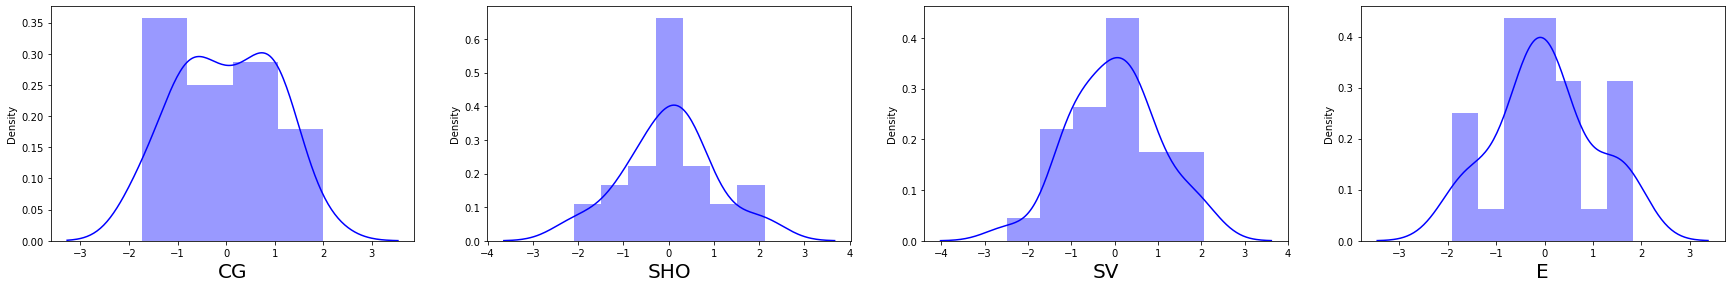

In [16]:
#After removing let's check how the data has been distributed in skewed columns.
plt.figure(figsize = (30,25))
n = 1

for column in df[features]:
    if n <=17:
        ax = plt.subplot(5,4,n)
        sns.distplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        
    n+=1
plt.show()

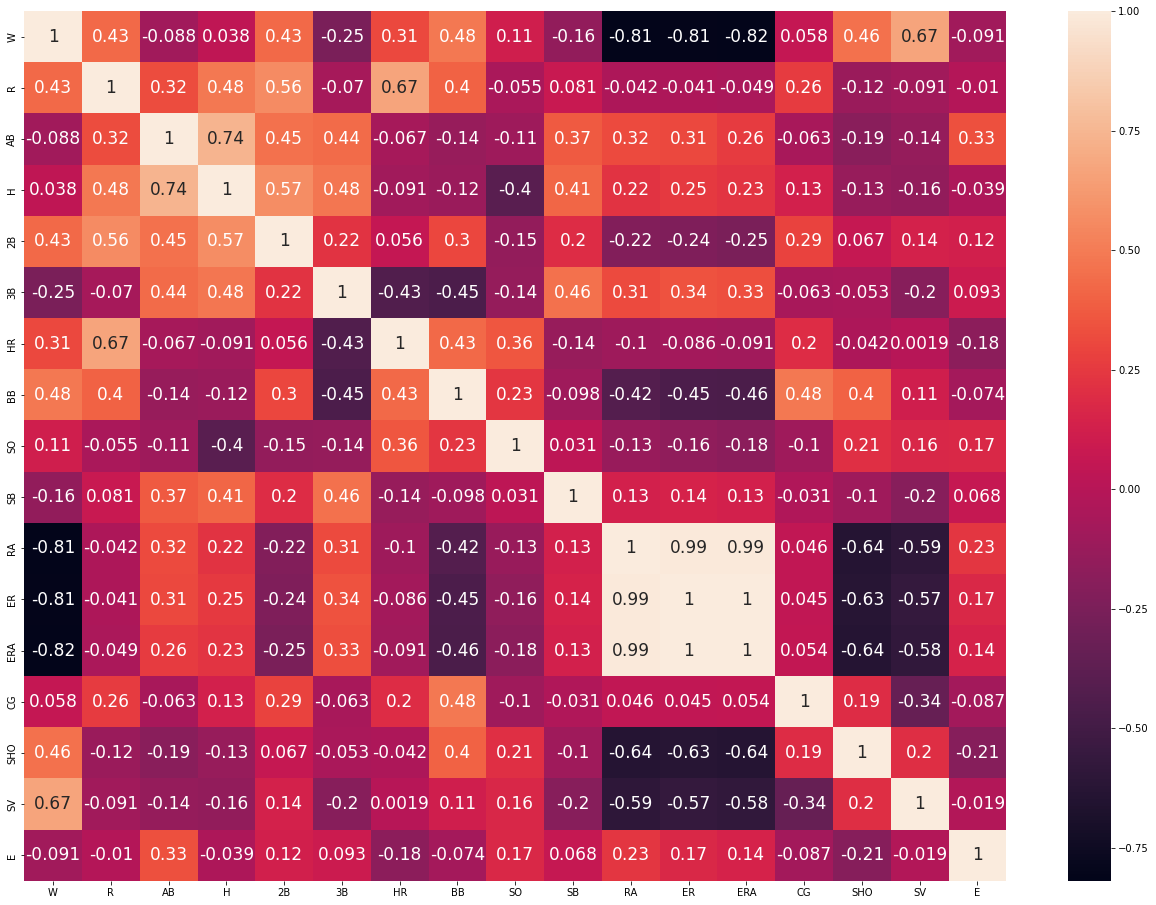

In [17]:
# Feature selection process
# visualize relationship between features and label using heatmap
df_corr = df.corr()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':17})
plt.show()

Looks like there is close relationship between ER and RA, ERA and RA

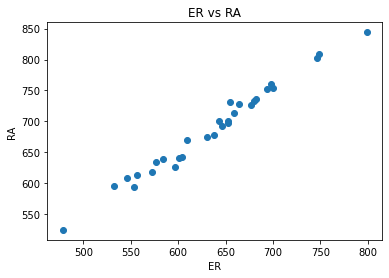

In [18]:
# Check if they are really related
plt.scatter(df['ER'],df['RA'])
plt.xlabel('ER')
plt.ylabel('RA')
plt.title('ER vs RA')
plt.show()

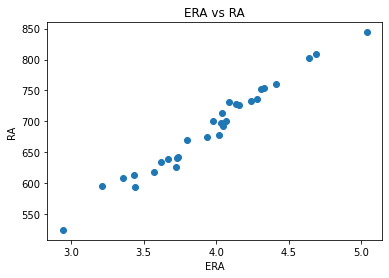

In [19]:
# Check if they are really related
plt.scatter(df['ERA'],df['RA'])
plt.xlabel('ERA')
plt.ylabel('RA')
plt.title('ERA vs RA')
plt.show()

From the above scatter plots we could see some trend which looks like the features are related<br>
Now we shall observe which features to delete by checking how they are related to label<br>
ER is having -0.81 correlation with w and RA is also having -0.81 correlation with w<br>
ERA is having -0.82 correlation with w and RA is also having -0.81 correlation with w<br>
So all the 3 features are having almost same correlation value with the target

Scaling Data using StandardScaler

In [20]:
x = df.drop('W',axis=1)
y= df['W']

In [21]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

Check variance inflation factor

In [22]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,11.026443,R
1,13.104084,AB
2,9.405416,H
3,3.715479,2B
4,3.157335,3B
5,10.489666,HR
6,3.716105,BB
7,2.801225,SO
8,1.956362,SB
9,199.583536,RA


From VIF values i can say that multicolinearity exists in RA,ER,ERA. So let me drop RA, ERA and ER columns to avoid multicolinearity.

In [23]:
df = df.drop(columns=['ER','RA','ERA'])

Let's check the data distribution now after data transformation

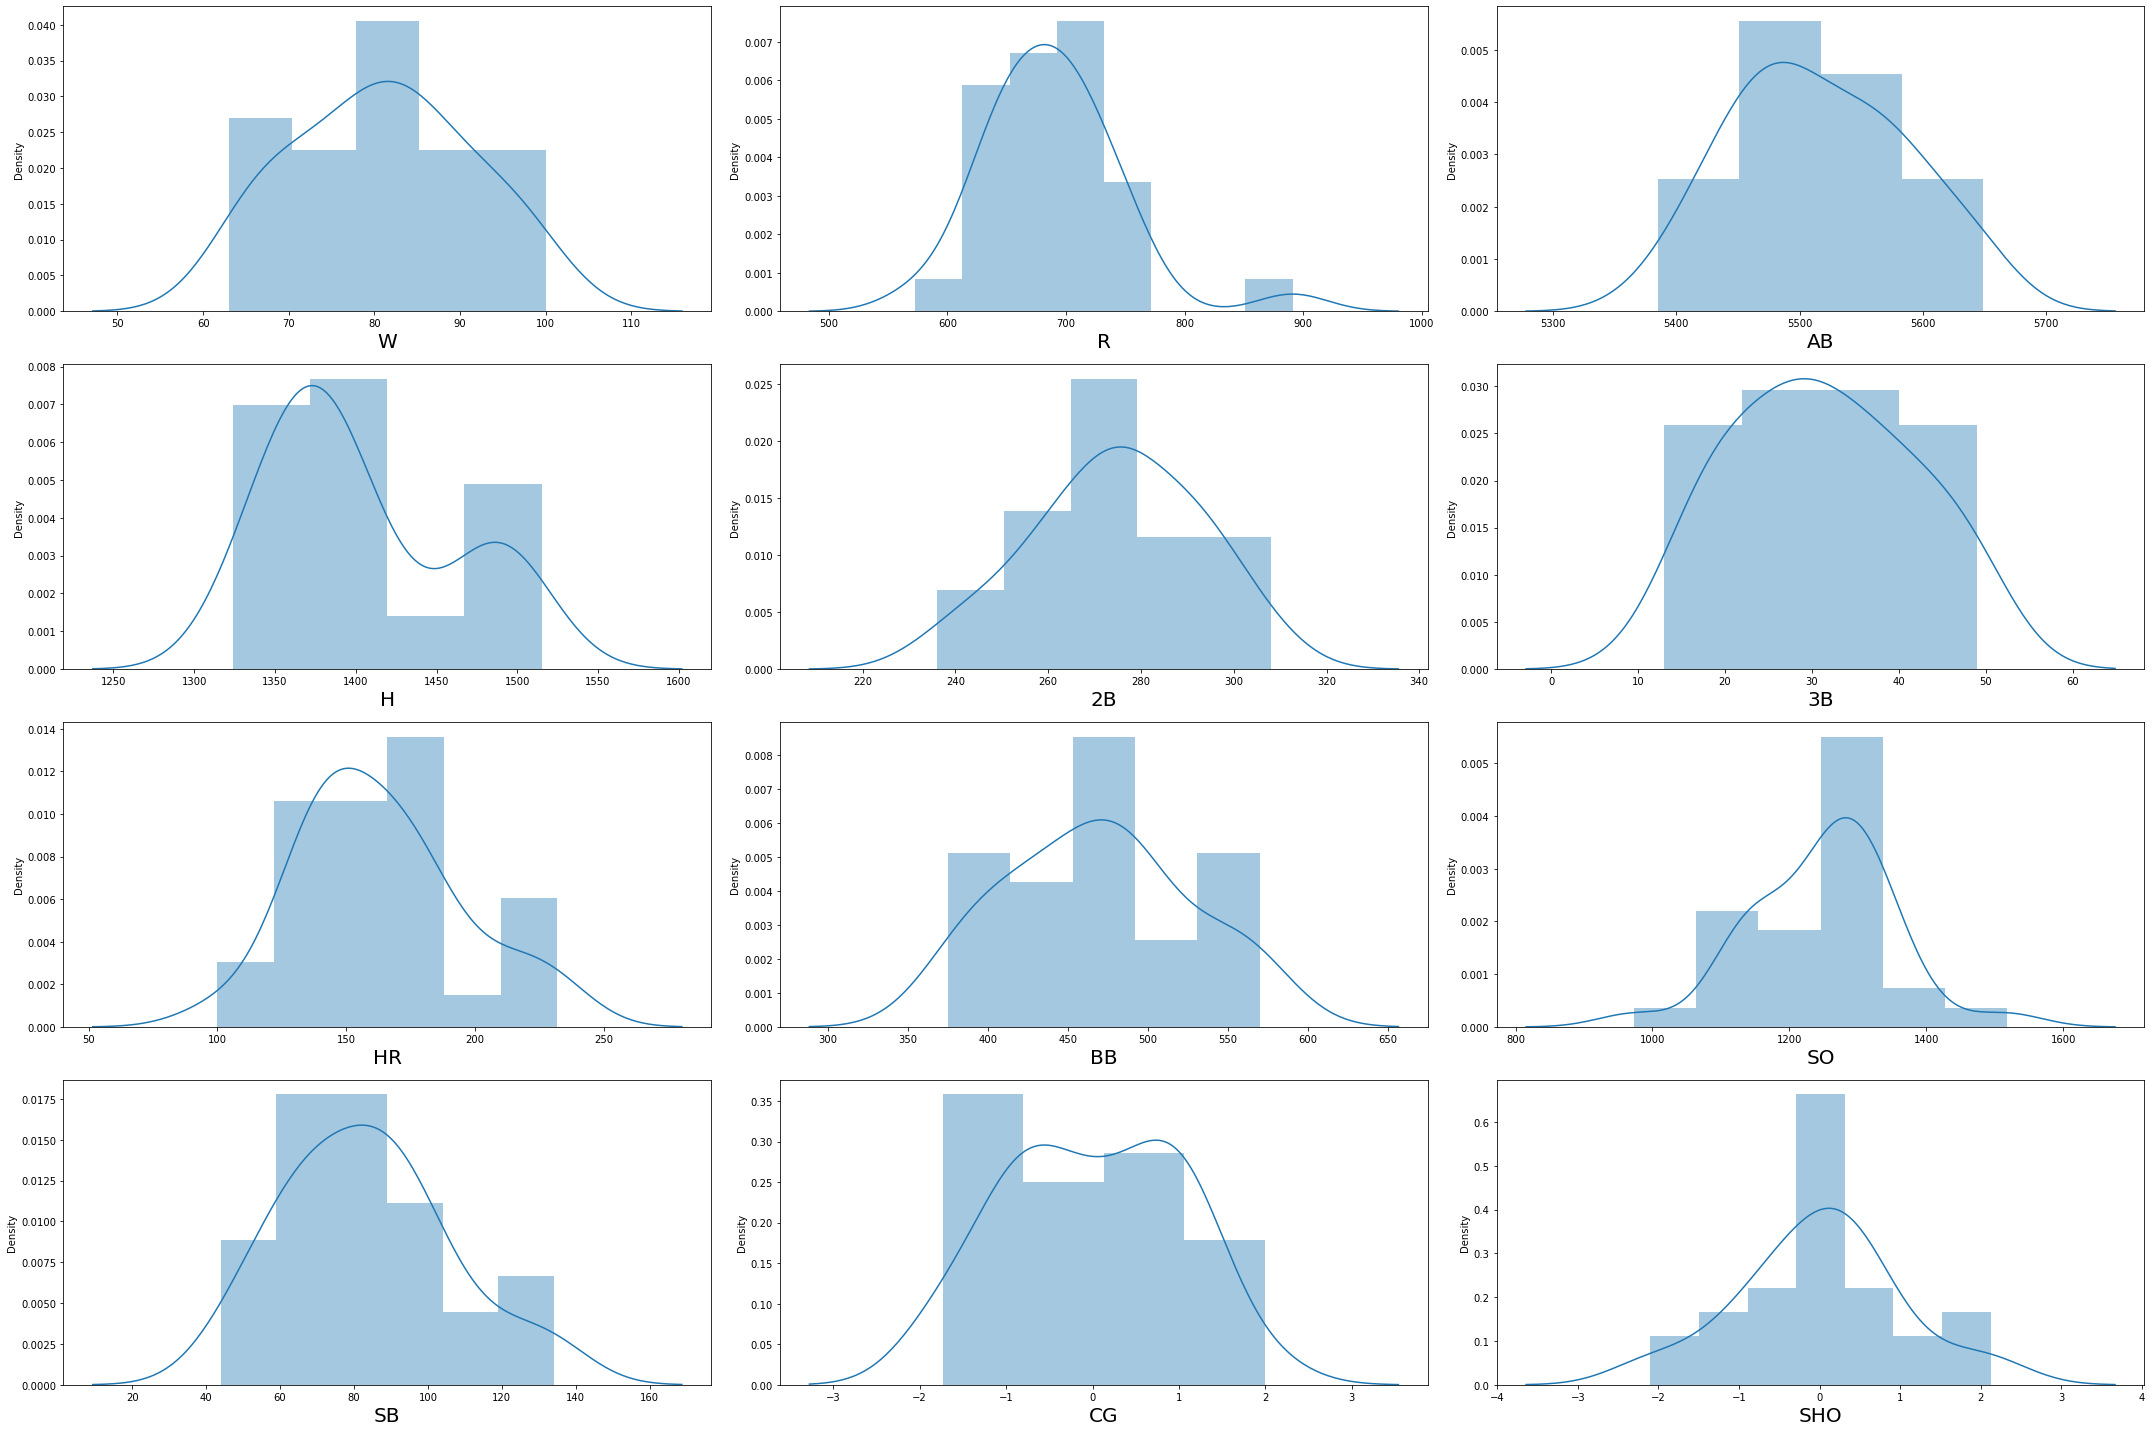

In [24]:
# check data distribution
plt.figure(figsize=(30,20))
n = 1
for col in df:
    if n<=12:
        ax = plt.subplot(4,3,n)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    n+=1
plt.tight_layout()

In [25]:
#Split the data into 2 parts using Hold Out method
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.25,random_state=99)

In [26]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_pred=lr.predict(x_test)

1.0


In [27]:
print('MSE:',mean_squared_error(lr_pred,y_test))
print('MAE:',mean_absolute_error(lr_pred,y_test))
print('r2_score:',r2_score(lr_pred,y_test))

MSE: 7.32062920045099e-28
MAE: 2.3092638912203256e-14
r2_score: 1.0


LR is giving me 100% r2_score.

In [28]:
# model instantiation with default parameters
knn = KNeighborsClassifier()
# Train the model
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print(classification_report(y_test,knn_pred,digits=2))

              precision    recall  f1-score   support

          63       0.00      0.00      0.00       1.0
          64       0.00      0.00      0.00       0.0
          67       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       0.0
          71       0.00      0.00      0.00       0.0
          74       0.00      0.00      0.00       0.0
          79       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       1.0
          85       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       1.0
          98       0.00      0.00      0.00       1.0
         100       0.00      0.00      0.00       1.0

    accuracy                           0.00       8.0
   macro avg       0.00      0.00      0.00       8.0
weighted avg       0.00      0.00      0.00       8.0



In [29]:
# DT model instantiation with default parameters
dt = DecisionTreeClassifier()
# Train the model
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
accuracy_score(y_test,dt_pred)

0.0

In [30]:
# model instantiation with default parameters
rfc = GradientBoostingClassifier()
# Train the model
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
accuracy_score(y_test,rfc_pred)

0.0

From the above 4 models accuracy results, we can continue with LinearRegression but we need to check for overfitting using Lasso regressor

In [31]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [32]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,lr_pred))
print('mae:',metrics.mean_absolute_error(y_test,lr_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))

R2_score: 0.999999999998034
mse: 7.32062920045099e-28
mae: 2.3092638912203256e-14
rmse: 2.7056661287843684e-14


Cross validation

In [33]:
rmse =-(cross_val_score(lr,x_scaled,y,cv=10))
print("{}   : {:.6f}, {:4f}".format('LR',rmse.mean(),rmse.std()))

LR   : 5.820458, 16.635641


There is no need of hyper parameter tuning as already we have 1 r2_score. Let us go ahead and save the model

In [34]:
# save the model to disk
filename = 'Baseball_model.sav'
pickle.dump(lr, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_test)
result

array([ 67.,  63.,  98.,  85.,  83.,  79.,  88., 100.])

In [35]:
pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7
Predicted,67.0,63.0,98.0,85.0,83.0,79.0,88.0,100.0
Original,67.0,63.0,98.0,85.0,83.0,79.0,88.0,100.0
